<center><h2><b>8. Quantum uncertainty in the harmonic oscillator</b></h2></center>
<center><h4>Exercise 5.13 from Computational Physics by Mark Newman</h4></center>
<center><h4>Code Author: Pratiksha Balasaheb Gaikwad</h4></center>
<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr style="height:2px;border-width:0;color:blue;background-color:blue">




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, factorial, pi, log
from gaussxw import gaussxw, gaussxwab
from scipy.interpolate import interp1d


**Exercise 5.13: Quantum uncertainty in the harmonic oscillator**

In units where all the constants are 1, the wavefunction of the 11th energy level of the one-dimensional quantum harmonic oscillator-Le., a spinless point particle in a quadratic potential well-is given by
$$\psi_n(x) =  \frac{1}{\sqrt{2^nn!\sqrt(pi)}}e^{-x^2/2}H_n(x),$$

for $n = 0 ... \inf$, where $H_n(x)$ is the $n^{th}$ Hermite polynomial. Hermite polynomials satisfy a relation somewhat similar to that for the Fibonacci numbers, although more
complex:

$$ H_{n + 1} (x) = 2xH_n(x) - 2nH_{n-1}(x).$$

<center><b>Q. a) Write a user-defined function H(n,x) that calculates $H_n(x)$for given x and any integer $n\geq 0$. Use your function to make a plot that shows the harmonic oscil-
lator wavefunctions for $n = 0, 1, 2 ,3$, all on the same graph, in the range $x = -4$ to $x = 4$. Hint: There is a function factorial in the math package that calculates the factorial of an integer.</b></center>

In [2]:
def H(n,x):
    '''Calculate the value of the n^{th} HERMITE Polynomial.
     
    Inputs:
    order of the polynomial (n) [Any integer n >= 0]
    given data point (x)
     
    Returns:
    value of the n^{th} order polynomial at given x value.
     
    Note:
    Given relation: for (n+1)^{th} order polynomial
    H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x)
     
    To get n^{th} order polynomial, substituting n == n-1 gives,
    H_{n}(x) = 2xH_{n-1}(x) - 2(n-1)H_{n-2}(x)
     
    '''
    if n == 0:      
        return 1 # H_0
    elif n==1:
        return 2*x # H_1
    elif (n>1):
        tmp2 = 1   # Starting with n-2
        tmp1 = 2*x # Starting with n-1
        tmp = 0  # For H_n value
    
        for k in np.arange(2,n+1,1): 
            #print(k)
            #print(tmp1, tmp2)
            #tmp1 == H_{n-1} # tmp2 == H_{n-2}
            tmp = 2*x*tmp1 - 2*(k-1)*tmp2 
         
            # Pushing values for next iteration    
            tmp2 = tmp1
            tmp1 = tmp
           
        return tmp
        
    

In [3]:
print(H(4,1)) #checking Hermite numbers

-20


In [4]:
def psi(n,x):
    '''
    Calculates and returns the value of the wavefunction of the n^{th} energy level of the one-dimensional quantum harmonic oscillator.
    
    Inputs:
    energy level (n)
    position of particle (x)
    
    Returns:
    the psi_n(x) value
    '''
    val = np.exp(-x*x/2)*H(n,x)/sqrt((2**n)*factorial(n)*sqrt(pi))
    return val

In [5]:
# given n = 0,1,2,3
n_vals = np.arange(0,4,1) 
#print(n_vals)

# spacing used: 0.01 between two consequtive x values
x_vals = np.arange(-4,4.25,0.01) # range x = -4 to x=4
#print(x_vals)

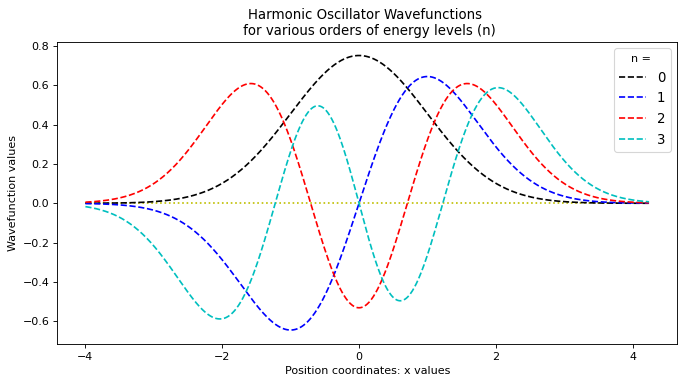

In [6]:
# List of colors for plots
colors = ['k', 'b','r','c']

fig, ax = plt.subplots(figsize=(10, 5), dpi=80)

#plotting a reference straight yellow-dotted line 
ax.plot(x_vals,np.zeros(x_vals.size), 'y:')

for n in n_vals:
    psinx = [psi(n,x) for x in x_vals]
    ax.plot(x_vals,psinx, f'{colors[n]}--',label=f'{n}')

legend = ax.legend(loc='best', fontsize='large', title="n = ")
ax.set_title('Harmonic Oscillator Wavefunctions \n for various orders of energy levels (n)')
ax.set_ylabel('Wavefunction values')
ax.set_xlabel('Position coordinates: x values')

plt.show()

<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<center><b>Q. b) Make a separate plot of the wavefunction for $n = 30$ from $x = -10$ to $x = 10$.
Hint: If your program takes too long to run in this case, then you're doing the
calculation wrong-the program should take only a second or so to run.</b></center>

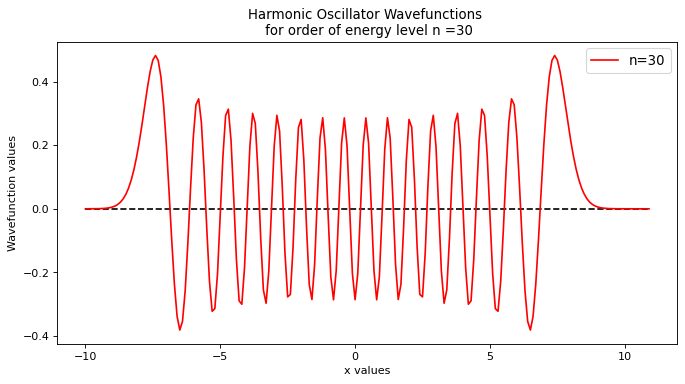

CPU times: user 91.5 ms, sys: 5.5 ms, total: 97 ms
Wall time: 99.9 ms


In [7]:
%%time

# for the range x = -10 to x =10
xs = np.arange(-10,11,.1)

fig, ax = plt.subplots(figsize=(10, 5), dpi=80)

#plotting a reference straight yellow-dotted line 
ax.plot(xs,np.zeros(xs.size), 'k--')

# Wavefunction values for input x
psi30x = [psi(30,x) for x in xs]


ax.plot(xs, psi30x, 'r-',label='n=30')
legend = ax.legend(loc='best', fontsize='large')
ax.set_title('Harmonic Oscillator Wavefunctions \n for order of energy level n =30')
ax.set_ylabel('Wavefunction values')
ax.set_xlabel('x values')

plt.show()

<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<b>Q. c)The quantum uncertainty in the position of a particle in the $n^{th}$ level of a harmonic oscillator can be quantified by its root-mean-square position $\sqrt{\langle x^2\rangle}$, where $$\langle x^2\rangle = \int_{-inf}^{inf}x^2|\psi_n(x)|^2 dx$$.
Write a program that evaluates this integral using Gaussian quadrature on 100 points, then calculates the uncertainty (i.e., the root-mean-square position of the
particle) for a given value of $n$. Use your program to calculate the uncertainty for $n = 5$. You should get an answer in the vicinity of $\sqrt{\langle x^2\rangle} = 2.3$.</b>


$$\begin{split}
        \langle x^2 \rangle &= \int_{-\inf}^{\inf}x^2 |\psi_n(x)|^2dx 
    \end{split}$$
    
Converting the integration function in terms of z:

$$\int_{-\inf}^{\inf} f(x) dx = \int_{-1}^{1} \frac{1+z^2}{(1-z^2)^2}f\bigg(\frac{z}{1-z^2}\bigg)dz$$

where,
$$x = \frac{z}{1-z^2}, \quad \quad dx = \frac{1+z^2}{(1-z^2)^2}dz$$



In [8]:
def f(z,nval):
    '''
    Function that inputs the z value & returns value of integral over [-1,1].
    
    Inputs:
    value of position coordinate (z)
    order of energy level for wavefunction (n)
    
    Returns:
    Value of integration function
    '''
    new_x = z/(1-z**2)
    fval = (new_x**2)*(abs(psi(nval,new_x)))**2*(1+z**2)/((1-z**2)**2)
    return fval
    

In [9]:
# changing limits as per above formulas
zmin = -1
zmax = 1

N = 100 # No. of grid points for gaussian quadrature
#Obtaining numpy arrays of nodes & weights 
x, w =  gaussxwab(N,zmin,zmax)

nval = 5 
rms = 0.0
for i in range(x.size):
    rms += w[i]*f(x[i],nval) # passing z to the function
rms = np.sqrt(rms) 

print(f"Uncertainty in the position of the particle for n = {nval}, is {rms}.")


Uncertainty in the position of the particle for n = 5, is 2.3452078737858177.


__Above result is matching with the given expected value of RMS position.__

<hr style="height:2px;border-width:0;color:blue;background-color:blue">
<hr style="height:2px;border-width:0;color:blue;background-color:blue">